# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 
from sklearn.utils import Bunch
import sklearn as sklearn

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In the following we start using a dataset (from UCI Machine Learning repository)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [3]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [4]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [5]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [6]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [7]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [8]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [9]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [10]:
KFOLD = 5
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=KFOLD) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [11]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=KFOLD, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [13]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


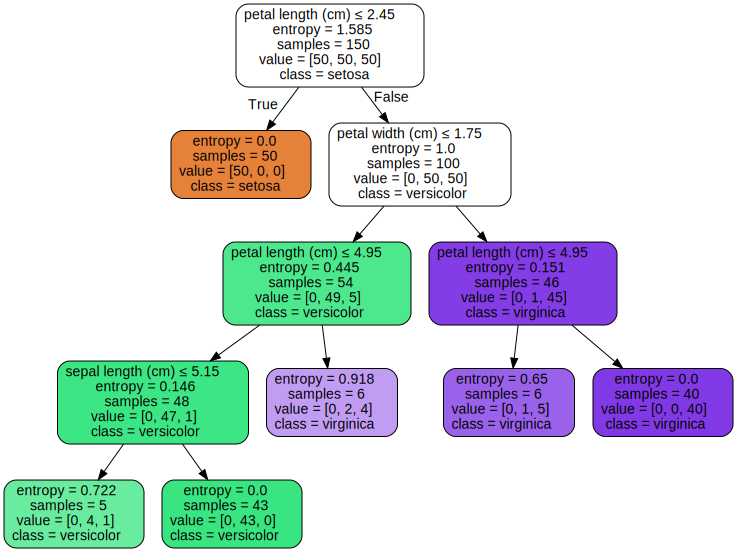

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Exercise \#1: Artificial Inflation on training set

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import load_iris

# global setup 
setosa_color = mpl.colors.to_rgb('#eb4d4b')
versicolor_color = mpl.colors.to_rgb('#686de0')
virginica_color = mpl.colors.to_rgb('#badc58')

target_colors = [setosa_color,versicolor_color,virginica_color]

eval_metrics={}


def print_evaluations(metrics):
    for dataset, metrics in eval_metrics.items():
        msg = "Model trained on {}. Accuracy score: {:.4f}. "
        if 'f1-measure' in metrics:
            msg += "f1 score: {:0.4f}".format(metrics['f1-measure'])
        print(msg.format(dataset, metrics['accuracy']))

In [16]:
iris_stacked = np.column_stack((iris_X_train,iris_y_train)) # merge together features and labels columnwisely

# get indeces for the specified classes
virginica_indeces = np.where(iris_stacked[:,4]==1) # versicolor
versicolor_indeces = np.where(iris_stacked[:,4]==2) # virginica

# get instances for the specified classes
virginica = iris_stacked[virginica_indeces]
versicolor = iris_stacked[versicolor_indeces]

# inflating
virginica = np.repeat(virginica, 10, axis=0)
versicolor = np.repeat(versicolor, 10, axis=0)

# merging
inflated_iris = np.row_stack((iris_stacked, virginica, versicolor))
#np.random.shuffle(inflated_iris) #shuffling to avoid equals folds in cross validation

### Visualize class distribution

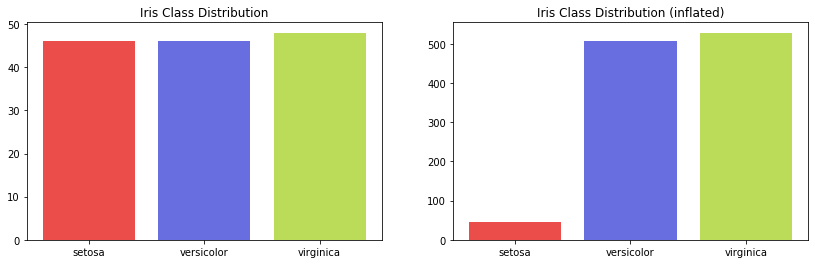

In [17]:
# plot class distributions
fig, axes = plt.subplots(1,2,figsize=(14,4))

class_distrib = np.bincount(iris_stacked[:,4].astype(np.int))
inflated_class_distrib = np.bincount(inflated_iris[:,4].astype(np.int))

bins=[0,1,2]
axes[0].bar(bins, class_distrib, tick_label=iris.target_names, color=[setosa_color,versicolor_color,virginica_color])
axes[0].set_title("Iris Class Distribution");


axes[1].bar(bins, inflated_class_distrib, tick_label=iris.target_names, color=[setosa_color,versicolor_color,virginica_color])
axes[1].set_title("Iris Class Distribution (inflated)");

### Evaluations on inflated dataset

Evaluating the model with the augmented dataset, virginica and versicolor' istances are 10 times more than the original iris dataset. The model evaluation is executed with 10-fold cross validation

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# train and evaluate on iris
clf.fit(iris_X_train,iris_y_train)
predictions = clf.predict(iris_X_test)

acc_score = accuracy_score(iris_y_test, predictions)
f1=sklearn.metrics.f1_score(iris_y_test, predictions, average='macro')

eval_metrics['iris']={'accuracy':acc_score,'f1-measure':f1}

# train and evaluate on inflated iris
inflated_iris_X_train = inflated_iris[:,0:4]
inflated_iris_y_train = inflated_iris[:,4]

clf.fit(inflated_iris_X_train,inflated_iris_y_train)
predictions = clf.predict(iris_X_test)

acc_score = accuracy_score(iris_y_test, predictions)
f1=sklearn.metrics.f1_score(iris_y_test, predictions, average='macro')

eval_metrics['inflated-iris']={'accuracy':acc_score,'f1-measure':f1}

print_evaluations(eval_metrics)

Model trained on iris. Accuracy score: 0.9000. f1 score: 0.8857
Model trained on inflated-iris. Accuracy score: 0.9000. f1 score: 0.8857


## Modify class weights

In [19]:
class_weights = {0:1, 1:10, 2:10}
clf_weighted = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight=class_weights)
clf.fit(iris_X_train,iris_y_train)
predictions = clf.predict(iris_X_test)

acc_score = accuracy_score(iris_y_test, predictions)
f1=sklearn.metrics.f1_score(iris_y_test, predictions, average='macro')

eval_metrics['iris (class weighted)']={'accuracy':acc_score,'f1-measure':f1}

print_evaluations(eval_metrics)

Model trained on iris. Accuracy score: 0.9000. f1 score: 0.8857
Model trained on inflated-iris. Accuracy score: 0.9000. f1 score: 0.8857
Model trained on iris (class weighted). Accuracy score: 0.9000. f1 score: 0.8857


## Hyperparameters Optimization

To find the best combination of hyperparameter we apply an *exhaustive search* over the *parameter space*.

In [20]:
params = {'max_depth':np.arange(2,20),
          'min_samples_split':np.arange(2,10),
          'min_samples_leaf':np.arange(1,10),
          'max_leaf_nodes':np.arange(2,20),
          'min_impurity_decrease':np.linspace(0,1,11)}
                                     
clf = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),params,
                                           scoring=['accuracy'],n_jobs=4,
                                           refit='accuracy')
clf.fit(iris_X_train,iris_y_train);

In [21]:
best_clf = clf.best_estimator_
eval_metrics['iris hyperparams optimization']={'accuracy':clf.best_score_}
print_evaluations(eval_metrics)

Model trained on iris. Accuracy score: 0.9000. f1 score: 0.8857
Model trained on inflated-iris. Accuracy score: 0.9000. f1 score: 0.8857
Model trained on iris (class weighted). Accuracy score: 0.9000. f1 score: 0.8857
Model trained on iris hyperparams optimization. Accuracy score: 0.9786. 


## Confusion Matrix

Text(0.5, 1.0, 'Decision tree with optimized params')

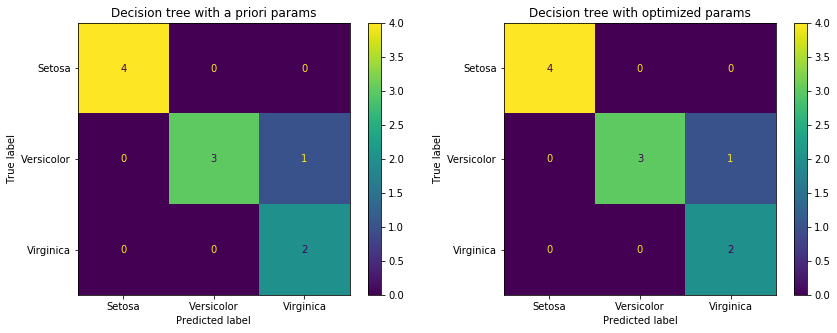

In [22]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)

fig, axes = plt.subplots(1,2,figsize=(14,5))

sklearn.metrics.plot_confusion_matrix(best_clf,iris_X_test,iris_y_test,display_labels=['Setosa','Versicolor','Virginica'],ax=axes[0])
sklearn.metrics.plot_confusion_matrix(clf,iris_X_test,iris_y_test,display_labels=['Setosa','Versicolor','Virginica'],ax=axes[1])

axes[0].set_title('Decision tree with a priori params')
axes[1].set_title('Decision tree with optimized params')

## Coverage and ROC Spaces
Coverage and roc plot are natural suitable for *binary classifiers*. To extend to a multiclass case we apply a *one-vs-rest* scheme.
Essentially we construct $K$ **binary** classifiers, and in turn we fit the $i$-th classifier to a traning set where instances of class $C_i$ are mapped to the *positive class* and the remaing intstances of class $C_j \ i\neq j$ are mapped to the *negative class*.

In [23]:
from sklearn.multiclass import OneVsRestClassifier

clf = sklearn.tree.DecisionTreeClassifier(criterion="entropy",random_state=300,
                                                           min_samples_leaf=3, min_impurity_decrease=0.0,
                                                           max_depth=3, max_leaf_nodes=4)
ovr_clf = OneVsRestClassifier(clf)
ovr_clf.fit(iris_X_train,iris_y_train);

We can access to the binary classfiers of OneVSRest, so we visualize the decision tree associated.

In [24]:
for i, treez in enumerate(ovr_clf.estimators_):
    class_name = iris.target_names[i]
    print(class_name)
    graph = graphviz.Source( tree.export_graphviz(treez,out_file=None,filled=True, feature_names=iris.feature_names, class_names=iris.target_names) ) 
    graph.render("Tree {}".format(iris.target_names[i]))
    graph.view()

setosa
versicolor
virginica


To build the coverage and roc curves, we follow the pseudo algorithm written in [Peter Flach's book](https://www.cambridge.org/core/books/machine-learning/621D3E616DF879E494B094CC93ED36A4):
* Access the "local probability distribution" contained in the decision tree' leves. (computed by `get_leaves` function)
* Compute the *empirical probability of the positive class* with *laplace smoothing*
$$
\dot{p}=\frac{n^+ +1}{n^+ + n^- +2}
$$
* Rank the leaves in **decreasing** order by empirical probability
* Each point $(x,y)$ in the coverage space is given by the **ranked leaves** cumulative TP and FP:
$$ (x,y) = (TP,FP) $$ instead for the roc curve: 
$$(x,y) = (\frac{TP}{POS},\frac{FP}{NEG})$$ 
The last 3 points are computed by `get_coverage_curve` and `get_roc_curve` functions.

In [25]:
def get_leaves(tree):
    """
    return mask of leaves indeces (eg. [True,False,True] means that first and last nodes in the tree are leaves)
    and leaves values -> a 2d array of [[a,b],[c,d]] where a,c are negative class instances in the respective nodes, b,d positive ones.
    """
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=np.bool)
   
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    return is_leaves, np.squeeze(tree.tree_.value[is_leaves],axis=1)

def get_coverage_curve(estimator):

    _, leaves = get_leaves(estimator) #get leaves

    empirical_proba = (leaves[:,1] +1)/ (np.sum(leaves,axis=1) +2) # compute empirical probabilities (positive class instances / total instances)

    ind = np.argsort(empirical_proba)[::-1] # return the indices that makes empirical_proba sorted in descending order
    
    coverage_points = np.cumsum(leaves[ind],axis=0) # get the actual point in coverage space
    coverage_points = np.row_stack(([0,0],coverage_points)) ## add a "dummy" origin point
    
    return coverage_points



def get_roc_curve(estimator):

    _, leaves = get_leaves(estimator) #get leaves

    empirical_proba = (leaves[:,1] +1)/ (np.sum(leaves,axis=1) +2) # compute empirical probabilities (positive class instances / total instances)

    ind = np.argsort(empirical_proba)[::-1] # return the indices that makes empirical_proba sorted in descending order
    
    coverage_points = np.cumsum(leaves[ind],axis=0) # get the actual point in coverage space
    coverage_points = np.row_stack(([0,0],coverage_points)) # add a "dummy" origin point
    
    roc_points = coverage_points / np.sum(leaves,axis=0) # normalize (TP/POS and FP /NEG)
    
    return roc_points

### Coverage Space

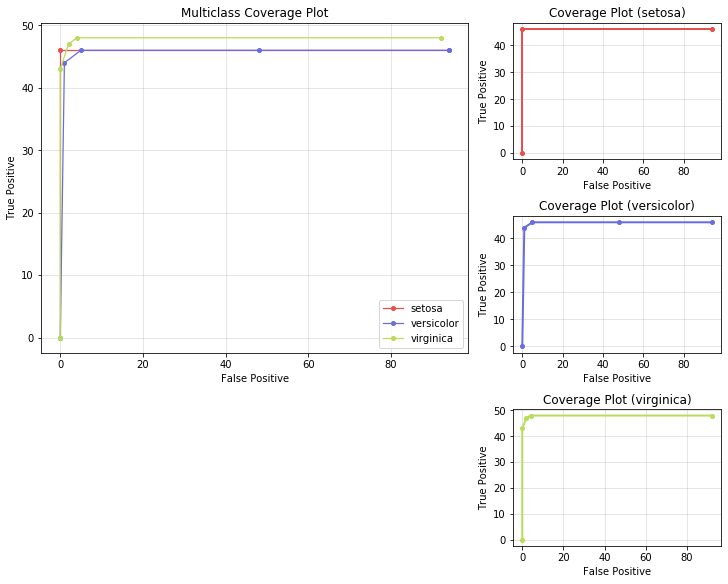

In [26]:
fig= plt.figure(figsize=(10,8),constrained_layout=True)

gs=fig.add_gridspec(3,3)
main_ax=fig.add_subplot(gs[:2,0:2])
setosa_ax = fig.add_subplot(gs[0,2])
versicolor_ax = fig.add_subplot(gs[1,2])
virginica_ax = fig.add_subplot(gs[2,2])

axes=[setosa_ax,versicolor_ax,virginica_ax]

for treeclf,ax,class_name,color in zip(ovr_clf.estimators_,axes,iris.target_names,target_colors):
    points = get_coverage_curve(treeclf)
   
    ax.plot(points[:,0], points[:,1], marker='o', markersize=4, linewidth=2, c=color)
    ax.set_xlabel('False Positive')
    ax.set_ylabel('True Positive')
    ax.set_title('Coverage Plot ({})'.format(class_name))
    ax.grid(True,alpha=0.4)
    
    main_ax.plot(points[:,0], points[:,1],  marker='o', markersize=4, linewidth=1.25, c=color,label=class_name)
    
main_ax.set_xlabel('False Positive')
main_ax.set_ylabel('True Positive')
main_ax.set_title('Multiclass Coverage Plot')
main_ax.grid(True,alpha=0.4)
main_ax.legend();

### ROC Space

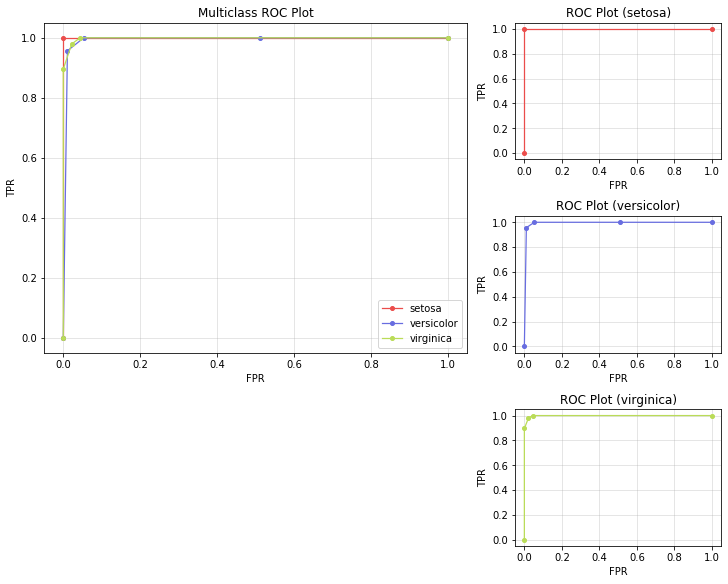

In [27]:
fig= plt.figure(figsize=(10,8),constrained_layout=True)

gs=fig.add_gridspec(3,3)
main_ax=fig.add_subplot(gs[:2,0:2])
setosa_ax = fig.add_subplot(gs[0,2])
versicolor_ax = fig.add_subplot(gs[1,2])
virginica_ax = fig.add_subplot(gs[2,2])


axes=[setosa_ax,versicolor_ax,virginica_ax]

for treeclf,ax,class_name,color in zip(ovr_clf.estimators_,axes,iris.target_names,target_colors):
    points = get_roc_curve(treeclf)
   
    ax.plot(points[:,0], points[:,1], marker='o', markersize=4, linewidth=1.25, c=color)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Plot ({})'.format(class_name))
    ax.grid(True,alpha=0.4)
    
    main_ax.plot(points[:,0], points[:,1],  marker='o', markersize=4, linewidth=1.25, c=color,label=class_name)
    
main_ax.set_xlabel('FPR')
main_ax.set_ylabel('TPR')
main_ax.set_title('Multiclass ROC Plot')
main_ax.grid(True,alpha=0.4)
main_ax.legend();